## Installing dependecies

In [35]:
#Installing dependencies
! git clone https://github.com/sum33it/scalpy.git
! cd scalpy
! pip install hope
! python ./scalpy/setup.py install

! pip install triangle
# First installing emcee

!python -m pip install -U pip
!pip install -U setuptools setuptools_scm pep517
!pip install -U emcee
!pip install astroML
!pip install corner


#lIBRARIES:

import emcee
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from astroML.plotting import plot_mcmc
from astroML.resample import bootstrap
from scipy import optimize
import scalpy
from scalpy.scalpy.fluids import *
import emcee
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as pl
import triangle
from matplotlib.ticker import MaxNLocator

import matplotlib.pyplot as plt
import corner





fatal: destination path 'scalpy' already exists and is not an empty directory.
running install
/Users/saba/opt/anaconda3/lib/python3.8/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/Users/saba/opt/anaconda3/lib/python3.8/site-packages/setuptools/command/easy_install.py:156: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/Users/saba/opt/anaconda3/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(
running bdist_egg
running egg_info
writing ScalPy.egg-info/PKG-INFO
writing dependency_links to ScalPy.egg-info/dependency_links.txt
writing requirements to ScalPy.egg-info/requires.txt
writing top-level names to ScalPy.egg-info/top_level

# General API to measure H0 value from GW event and their possible counterparts

### (Based on Chen et al 2018)



Consider we have two kind of observations first from galaxy catalogs and second from gravitational wave estimations.

Now it means that wecan have to estimations of first $d_{GW}$ and second $d_{EM}$. 

Using Bayesian model for a single event with GW and EM data we can write the likelihood like this:

$$p(d_{GW}, d_{EM}| H_0) \ = \ \frac{\int \ p(d_{GW} , d_{EM} ,D_L, \alpha, \delta, z | H_0 ) \ dD_L \ d \alpha \ d \delta \ dz }{\beta(H_0)} \ = \ p(H_0 | d_{GW}, d_{EM}) \ p(H_0) $$

where $\beta(H_0)$ is just the normalization factor.

For the nominator we have:

$$ \int \ p(d_{GW} , d_{EM} ,D_L, \alpha, \delta, z | H_0 ) \ dD_L \ d \alpha \ d \delta \ dz = $$  
$$ \int \ dD_L d\alpha d\delta dz$$
<font color='blue'> $$p(d_{GW} | D_L, \alpha, \delta)$$</font>
<font color='green'> $$\ p(d_{EM} | z, \alpha, \delta)$$</font> 
<font color='purple'>$$p(D_L| z, H_0)$$</font> 
<font color='darkpink'>$$p_0(z, \alpha, \delta |H_0)$$</font>


Now I describe each term separately again:

* <font color='blue'> $p(d_{GW} | D_L, \alpha, \delta)$ </font> : GW likelihood from cosmological parameter estimation


* <font color='green'> $p(d_{EM} | z, \alpha, \delta)$</font>  : EM likelihood, if the event has an electromegnetic counterpart this term will just pick a galaxy from a whole galaxy catalog or number of galaxies, otherwise it's just a constant. I'll talk about this term after introducing the galaxy catalog more later.


*  <font color='purple'>$p(D_L| z, H_0)$</font> $ \ = \ \delta_D(D_L - D_L'(z, H_0)$ 


* <font color='darkpink'>$p_0(z, \alpha, \delta |H_0)$</font> : Prior on redshift and cordiante distribution of the hosts which we get from the galaxy catalogs


## Prior function from galaxy catalog

We're getting prior information from the galaxy catalogs. This way, we assume that we can construct a catalog of all the potential host galaxies of an event. We take our prior this way as the some of gaussian distributions centered at the redshift and position of each galaxy in our candidates catalog.

This implies that if we make a prior from all the galaxies in a catalog for one time then we can use it for all the events all the time.

We define the prior this way:

$$ p_0(z, \alpha, \delta | H_0) = p_{catalog} (z , \alpha, \delta) \ =\  \frac{1}{N_{gal}} \Sigma_i^{N_{gal}} N[mean_{z_i} \sigma_{z_i}](z) \ N[mean_{\alpha_i} \sigma_{\alpha_i}](\alpha) \ N[mean_{\delta_i} \sigma_{\delta_i}](\delta)$$


We assume the localization of the objects are quite good so it means that we practically we assume delta functions at the posititons of each of the galaxies and then we assume a typicall standard deviation on the redshift of $c\sigma_z^i = 200 km/s$ , where $mean_{z_i}$ itself is the peculiar velocity corrected redshift of the galaxy.


# Loading GLADE+ data


In [1]:
import pandas as pd
catalog_data = pd.read_csv("./GLADE+.txt", sep =" ")
catalog_data


/Users/saba/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,GLADE-no,PGC-no,GWGC-name,HyperLEDA-name,2MASS-name,WISExSCOS-name,SDSS-DR16Q-name,Object-type-flag,RA,DEC,...,v_err,z_err,d_L,d_L_err,dist_flag,M_star,M_star_err,Merger_rate,Merger_rate_err,Unnamed: 39
0,1,43495.0,NGC4736,NGC4736,12505314+4107125,J125053.14+410712.7,NaN,G,192.721451,41.120152,...,NaN,0.000029,4.392418,NaN,3,NaN,NaN,NaN,NaN,NaN
1,2,41934.0,NGC4548,NGC4548,12352642+1429467,J123526.45+142946.9,NaN,G,188.860123,14.496320,...,0.000732,0.000119,15.876007,3.263033,3,0.55,0.07,4.0,0.8,NaN
2,3,60921.0,NGC6503,NGC6503,17492651+7008396,J174926.45+700840.8,NaN,G,267.360474,70.144341,...,0.000222,0.000029,12.446600,0.987781,3,NaN,NaN,NaN,NaN,NaN
3,4,40950.0,NGC4442,NGC4442,12280389+0948130,J122803.90+094813.3,NaN,G,187.016220,9.803620,...,0.000558,0.000103,11.461371,2.484465,3,0.68,0.09,4.1,0.8,NaN
4,5,41164.0,NGC4469,NGC4469,NaN,J122928.05+084500.8,NaN,G,187.367000,8.749890,...,0.000745,0.000120,15.180920,3.321809,3,0.36,0.05,3.8,0.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23181753,23181754,NaN,NaN,NaN,NaN,NaN,235959.78+285717,Q,359.999118,28.954734,...,NaN,0.113916,20403.464630,NaN,1,NaN,NaN,NaN,NaN,NaN
23181754,23181755,NaN,NaN,NaN,NaN,NaN,235959.83+344315,Q,359.999303,34.720842,...,NaN,0.135597,27158.368406,NaN,1,NaN,NaN,NaN,NaN,NaN
23181755,23181756,NaN,NaN,NaN,NaN,NaN,235959.90+031606.9,Q,359.999615,3.268586,...,NaN,0.073688,8792.439985,NaN,1,NaN,NaN,NaN,NaN,NaN
23181756,23181757,NaN,NaN,NaN,NaN,NaN,235959.94+204315.8,Q,359.999759,20.721079,...,NaN,0.099325,16022.500633,NaN,1,NaN,NaN,NaN,NaN,NaN


In [9]:
RA_GLADE = catalog_data["RA"]
DEC_GLADE = catalog_data["DEC"]
z_GLADE = catalog_data["z_cmb"]
catalog_data.columns


Index(['GLADE-no', 'PGC-no', 'GWGC-name', 'HyperLEDA-name', '2MASS-name',
       'WISExSCOS-name', 'SDSS-DR16Q-name', 'Object-type-flag', 'RA', 'DEC',
       'B', 'B_err', 'B_flag', 'B_Abs', 'J', 'J_err', 'H', 'H_err', 'K',
       'K_err', 'W1', 'W1_err', 'W2', 'W2_err', 'W1_flag', 'B_J', 'B_J_err',
       'z_helio', 'z_cmb', 'z_flag', 'v_err', 'z_err', 'd_L', 'd_L_err',
       'dist_flag', 'M_star', 'M_star_err', 'Merger_rate', 'Merger_rate_err',
       'Unnamed: 39'],
      dtype='object')

# Loading GW parameter estimation result

In [51]:
#Loading the GW PE
import numpy as np
from __future__ import print_function
import os
import matplotlib
%matplotlib inline
from matplotlib import pyplot
import h5py
from IPython.display import Image
from pycbc.inference.io import loadfile

fp = loadfile('./d_L-posteriors/GW170814_103043-PYCBC-POSTERIOR-XPHM.hdf', 'r')
distance_posterior = np.array(fp["samples"]["distance"])
print(list(fp['samples'].keys()))


#We should load the GW posteriors here as our likelihoods
distance_posterior = np.array(fp["samples"]["distance"])
#RA and DEC are in raian I should convert them to degree before movign on
ra_posterior = np.array(fp["samples"]["ra"]) * 180 / np.pi
dec_posterior = np.array(fp["samples"]["dec"]) * 180 / np.pi


['chi_eff', 'chi_p', 'coa_phase', 'dec', 'delta_tc', 'distance', 'inclination', 'loglikelihood', 'logwt', 'q', 'ra', 'redshift', 'spin1_a', 'spin1_azimuthal', 'spin1_polar', 'spin2_a', 'spin2_azimuthal', 'spin2_polar', 'srcmass1', 'srcmass2', 'srcmchirp', 'srcmtot']


# First lets see some simple statistics about this event and its posteriors:

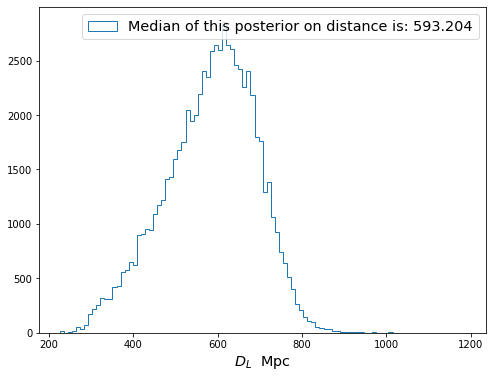

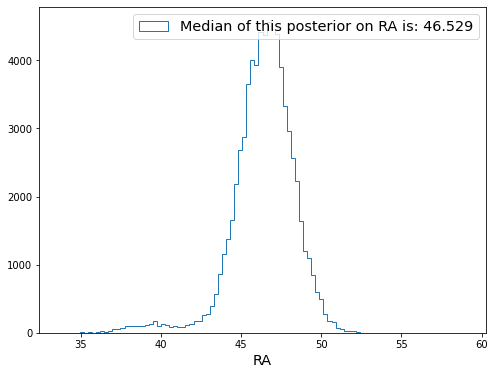

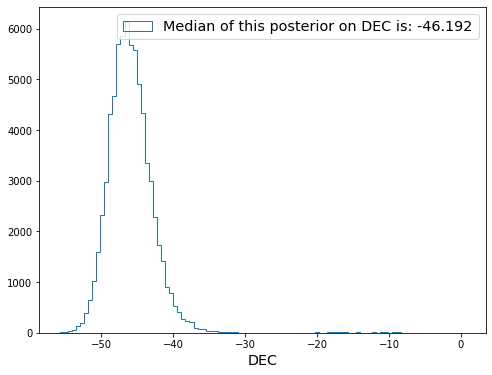

In [52]:
fig, ax = plt.subplots(1 , figsize = (8,6))
median_dist = np.median(distance_posterior)
plt.hist(distance_posterior, bins = 100, histtype = "step", label = "Median of this posterior on distance is: "+ str(np.round(median_dist, 3)))
plt.xlabel("$D_L \ $ Mpc", fontsize = "x-large")
plt.legend(fontsize = "x-large")
plt.show()


fig, ax = plt.subplots(1 , figsize = (8,6))
median_ra = np.median(ra_posterior)
plt.hist(ra_posterior, bins = 100, histtype = "step", label = "Median of this posterior on RA is: "+ str(np.round(median_ra, 3)))
plt.xlabel("RA", fontsize = "x-large")
plt.legend(fontsize = "x-large")
plt.show()


fig, ax = plt.subplots(1 , figsize = (8,6))
median_dec = np.median(dec_posterior)
plt.hist(dec_posterior, bins = 100, histtype = "step", label = "Median of this posterior on DEC is: "+ str(np.round(median_dec, 3)))
plt.xlabel("DEC", fontsize = "x-large")
plt.legend(fontsize = "x-large")
plt.show()

In [68]:
ra_std = np.std(ra_posterior)
dec_std = np.std(dec_posterior)

# Making the functions 

In [99]:
import scipy as sp
post = np.vstack([distance_posterior, ra_posterior, dec_posterior])
KDE_gw = sp.stats.gaussian_kde(post)

#Likelihoods
def likelihood_gw(z, H0, ra, dec):
    #Setting up the cosmology for calculating the corresponding luminosity distance
    from astropy.cosmology import FlatLambdaCDM
    cosmo = FlatLambdaCDM(H0=H0, Om0=0.308)
    d_L = cosmo.luminosity_distance(z)
    d_L = d_L.value #The value is in Mpc
    return KDE_gw([d_L, ra, dec])

#It should work now

# for each z and ra and dec we can compute the prior function by using the following:

def prior(z, ra, dec):
    #making the KDE around the galaxy's redahift:
    
    good_pos = (np.abs(RA_GLADE - ra) <= ra_std) & (np.abs(DEC_GLADE - dec) <= dec_std)
    mean_z = np.array(z_GLADE[good_pos])
    mean_z = mean_z[~np.isnan(mean_z)]
    sigma_z = 200 * 1000 / (3* (10**8))
    if len(mean_z) == 0: 
        return 0
    if len(mean_z) == 1:
        init_values =np.random.normal(loc=mean_z, scale=sigma_z, size=10000)
        KDE_z = sp.stats.gaussian_kde(init_values)
        return KDE_z(z)
    else:
        kde_value = 0
        for n_gal in range(len(mean_z)):
            #print(mean_z)
            #print("hell no")
            init_values =np.random.normal(loc=mean_z[n_gal], scale=sigma_z, size=10000)
            KDE_z = sp.stats.gaussian_kde(init_values)
            kde_value += KDE_z(z)
        return kde_value


__Now that we have prior and likelihood from the GW data we can move on to calculating the posterior on H0. we don't have any likelihood from electromagnetic counterpart now because we're working with the dark sirens that doesn't have any counterpart actually.__

__For our case actually we will have that :__
$$ p(d_{EM}| z, \alpha, \delta) \propto constant $$




Now the only thing that we should do before moving to the posterior construction we should account for the selection effects and normalization resulted by different factors:

    
    



In [100]:
#constructing the MCMC machinery and posteriors:

#For my first simple analysis I will use some assumptions in order to simplify the normalization factor
#to what is followed:

def normalization_factor(H0):
    return H0**3 

def lnprior(z, H0, ra, dec):
    
    #flat prior on H0 value between 20 and 200
	if 20 < H0 < 200:
		return np.log(prior(z,ra,dec))
	return -np.inf


#In the following I'll enter the normalization factor as a part of the likelihood

def lnlike(z, H0, ra, dec):
	return np.log(likelihood_gw(z, H0, ra, dec) / normalization_factor(H0))

def lnprob(z, H0, ra, dec):
	lp = lnprior(z, H0, ra, dec)
	if not np.isfinite(lp):
		return -np.inf
	return lp + lnlike(z, H0, ra, dec)

def ff(theta):
	z, H0, ra, dec=theta
	return -2.*lnprob(z, H0, ra, dec)

def lnp(theta):
	z, H0, ra, dec=theta
	return lnprob(z, H0, ra, dec)



In [107]:
#Finding maximum likelihood values to put as the first step:
lnprob(70*np.median(distance_posterior) / (3 * (10**5)), 70,median_ra,median_dec)

array([-10.7273119])

In [108]:
# Find the maximum likelihood value.
result = opt.minimize(ff, [70*np.median(distance_posterior) / (3 * (10**5)), 70,median_ra,median_dec])

In [109]:
result['x']

array([  0.13841422,  70.00000425,  46.52886237, -46.19227784])

In [112]:
from pycbc.pool import choose_pool
import warnings; warnings.simplefilter('ignore')
import time

z, H0, ra, dec = result['x']
print("""Maximum likelihood result:
    z = {0} (truth: {1})
    H0 = {2} (truth: {3})
    ra = {4} (truth: {5})
    dec = {6} (truth: {7})
""".format(z, 70*np.median(distance_posterior) / (3 * (10**5)) , H0, 70, ra, median_ra, dec, median_dec))


Maximum likelihood result:
    z = 0.13841421943906596 (truth: 0.13841430328141482)
    H0 = 70.00000424812367 (truth: 70)
    ra = 46.52886236756043 (truth: 46.528863137721764)
    dec = -46.1922778398671 (truth: -46.19227987328897)



In [ ]:

# Set up the sampler.
#Number of cores to use
pool = choose_pool(4)
pool.size=4
ndim, nwalkers = 4, 200


pos = np.array([result['x'] + 1e-3*np.random.randn(ndim) for i in range(nwalkers)])
#pos = np.vstack([np.linspace(20, 200, nwalkers), np.linspace(0.001, 0.5, nwalkers), np.linspace(-1000, 1000, nwalkers)]).T
print("Positions are: ", pos.shape)
sampler_newpostz_withpool = emcee.EnsembleSampler(nwalkers, ndim, lnp, pool = pool)
#print pos
# Clear and run the production chain.
print("Running MCMC...")
start = time.time()
sampler_newpostz_withpool.run_mcmc(pos, 1000, progress=True)
end = time.time()
print("With pooling done.")
serial_time = end - start
print("Serial took {0:.1f} seconds".format(serial_time))


Positions are:  (200, 4)
Running MCMC...
